<a href="https://colab.research.google.com/github/benjarojas/ADA-Informes/blob/main/Merge_Sort.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Problema de Ordenamiento
**Entrada**: Conjunto de n elementos $[ a_1, a_2, \ldots, a_n ]$

**Salida**: Permutación de los elementos de entrada $ [ a_1', a_2', \ldots, a_n' ] $ de forma que $ a_1' \leq a_2' \leq \ldots \leq a_n' $

El ordenamiento es un problema estudiado desde el comienzo de las ciencias de la computación, puesto que cada algoritmo que intenta resolver este problema tiene ventajas y desventajas para cada caso donde se quiera aplicar. En este informe se estudiará el algoritmo Merge Sort, diseñado inteligentemente utilizando el paradigma **Divide y Vencerás**.

# 2. Función Merge

## 2.1 Descripción de la Función
La función Merge se encarga de combinar 2 arreglos $A$ y $B$ previamente ordenados en un nuevo arreglo $C$ que contiene todos los elementos de $A$ y $B$ permutados de forma que están ordenados de menor a mayor.

1.   En cada iteración se comprueba si los contadores $i$ y $j$ (inicializados en $0$ antes de la primera iteración) que corresponden a posiciones dentro de los arreglos $A$ y $B$ respectivamente, son menores que el largo de los arreglos. Si no es así, el bucle no iterará.
2.   Luego se comprueba si el elemento $A_i$ es menor o igual al elemento $B_j$, y en ese caso, se agrega el elemento $A_i$ al arreglo $C$ y se aumentará en 1 el contador $i$.
En caso contrario, se agrega el elemento $B_j$ al arreglo $C$ y se aumenta el contador $j$ en 1.
3. Al finalizar el bucle, en uno de los arreglos habrán quedado elementos sin insertar en $C$, por lo que agregamos todos los elementos que hayan quedado desde los contadores $i$ y $j$ ($C = C + A[i \ldots n] + B[j \ldots n] $)


## 2.2 Implementación de Merge

In [222]:
from termcolor import colored

merge_comp = 0
def merge(A, B, verbose=False):
    i, j = 0, 0  # Indices de los arreglos y contador de comparaciones
    global merge_comp
    C = []  # Arreglo C (mezcla entre A y B)

    if(verbose):
        print(f"\nCombinando A: {A} y B: {B}")

    while(i < len(A) and j < len(B)):  # Mientras no se haya alcanzado el final de alguno de los arreglos
        if(verbose):
            print(
                f"\nComparando {colored(str(A[i]), 'magenta')} y {colored(str(B[j]), 'cyan')}:")
        if(A[i] <= B[j]):
            if(verbose):
                print(f"{colored(str(A[i]), 'magenta')} es menor o igual que {colored(str(B[j]), 'cyan')}, por lo que lo agregamos a {colored('C', 'blue')}")
            C.append(A[i])  # Añadimos el elemento a C
            i += 1  # Siguiente elemento
        else:
            if(verbose):
                print(f"{colored(str(B[j]), 'cyan')} es menor que {colored(str(A[i]), 'magenta')}, por lo que lo agregamos a {colored('C', 'red')}")
            C.append(B[j])  # Añadimos el elemento a C
            j += 1  # Siguiente elemento
        merge_comp += 1  # +1 comparacion

        if(verbose):
            print(f"\nDespues de esta iteración:")
            if(i < len(A)):
                print(f"A[{colored('i', 'magenta')}..n]: [{colored(str(A[i]), 'magenta')}, {', '.join(map(str, A[i+1:]))}]")
            else:
                print(f"A[{colored('i', 'magenta')}..n]: []")
            
            if(j < len(B)):
                print(f"B[{colored('j', 'cyan')}..n]: [{colored(str(B[j]), 'cyan')}, {', '.join(map(str, B[j+1:]))}]")
            else:
                print(f"B[{colored('j', 'cyan')}..n]: []")
            print(f"{colored('C:', 'red')} {C}")

    # Agregamos los elementos que no fueron comparados

    if(verbose):
        if(len(A[i:]) > 0):
            print("\nAgregamos los elementos restantes de A a C")
        if(len(B[j:]) > 0):
            print("\nAgregamos los elementos restantes de B a C")

    C = C + A[i:] + B[j:]
    merge_comp += len(A[i:] + B[j:])

    if(verbose): print(f"Arreglo ordenado C: {C}")
    # Retornamos una tupla con el arreglo mezclado y las comparaciones
    return C, merge_comp

In [223]:
A = [1, 9, 10, 50]
B = [8, 20, 34, 46]
print(f"A: {A}")
print(f"B: {B}")
C = merge(A, B)
print(f"merge(A,B): {C[0]}")
print(f"{C[1]} comparaciones realizadas.")

A: [1, 9, 10, 50]
B: [8, 20, 34, 46]
merge(A,B): [1, 8, 9, 10, 20, 34, 46, 50]
8 comparaciones realizadas.


# 3. Merge Sort

## 3.1 Descripción del Algoritmo
**Merge Sort** es un algoritmo de ordenamiento recursivo que se basa en el paradigma **_Divide y Vencerás_**.

Recibe como entrada un arreglo de números $a = [a_1, a_2, \ldots, a_n]$ y retorna un arreglo con los mismos elementos de entrada permutados y ordenados $a' = [a_1', a_2', \ldots, a_n']$.


1.   Si el largo del arreglo de entrada es $\leq 1$, se retorna el mismo arreglo. **_Este corresponde al caso base._**
2.   Calculamos la posición central del arreglo mediante una división entera entre 2: `mid = len(a) // 2`.
3.   A partir de esta posición central, se divide $a$ en 2 sub-arreglos llamados $A$ y $B$.
4.   Se llama recursivamente a la función para ordenar los arreglos $A$ y $B$.
5.   Finalmente, se retorna la unión ordenada de $A$ y $B$ mediante la función `merge()`.



## 3.2 Implementación del Algoritmo



In [224]:
call_count = 0 # Variable global, llamadas recursivas de merge_sort()
merge_comp = 0 # Reiniciamos la cantidad de comparaciones que hace merge()
def merge_sort(K, verbose=False):

    global call_count # Contador de llamadas recursivas

    if(call_count == 0 and verbose): print(f"Arreglo inicial: {K}\n")

    # Caso base, 0 o 1 elementos ya se encuentran ordenados
    if(len(K) <= 1):
      if(verbose): print(f"> Caso base, retornamos el arreglo: {K}")
      return K

    mid = len(K) // 2 # Calculamos posición central
    if(verbose): print(f"Separamos el arreglo en A{K[:mid]} y B{K[mid:]}")

    if(verbose): print(f"\nAhora llamamos recursivamente a merge_sort para ordenar A{K[:mid]}")
    call_count += 1 # Se suma una llamada recursiva
    A = merge_sort(K[:mid], verbose=verbose) # Sub-arreglo ordenado A[0...mid] llamando recursivamente a la función 

    if(verbose): print(f"\nAhora llamamos recursivamente a merge_sort para ordenar B{K[mid:]}")
    B = merge_sort(K[mid:], verbose=verbose) # Sub-arreglo ordenado B[mid...n] llamando recursivamente a la función
    call_count += 1 # Se suma una llamada recursiva

    if(verbose): print(f"\nLlamamos a merge para unir {A} y {B} en C[] y lo retornamos")
    M, C = merge(A,B, verbose=verbose)

    return M # Retornamos la mezcla de los 2 arreglos

In [225]:
arr = [4, 5, 6, 3, 7, 9, 2, 10]
print (f"Arreglo desordenado: {arr}")
arr = merge_sort(arr)
print (f"Arreglo ordenado: {arr}")
print(f"{call_count} llamadas recursivas.")
print(f"{merge_comp} comparaciones totales en merge.")

Arreglo desordenado: [4, 5, 6, 3, 7, 9, 2, 10]
Arreglo ordenado: [2, 3, 4, 5, 6, 7, 9, 10]
14 llamadas recursivas.
24 comparaciones totales en merge.


## 3.3 Ejemplo
Consideremos un arreglo $x = [3,1,5,2,4]$.

En la primera iteración, el algoritmo tomará el largo del arreglo `len(x)` y mediante una división entera entre 2 se calculará la posición del elemento central:

`mid = len(x) // 2 = 2`

A partir de esta posición, se divirá $x$ en 2 sub-arreglos principales $A$ y $B$, quedando:

$A = [3,1]$ y $B = [5,2,4]$

Luego, se llama recursivamente a la función para ordenar estos sub-arreglos. Partiremos por $A$.

En la llamada recursiva de $A$, calculamos su elemento central `mid = len(A) // 2 = 1`, por lo que $A$ se dividirá nuevamente en $A'$ y $B'$, quedando:

$A' = [3]$ y $B' = [1]$

Ahora, al llamar recursivamente a la función `merge_sort()` con los sub-arreglos $A'$ y $B'$, esta retornará el mismo arreglo en cada llamada, puesto que corresponde al caso base **_(arreglos de 1 único elemento se encuentran trivialmente ordenados_)**, por lo que se llama a la función `merge(A',B')` que unirá los arreglos ordenados, retornando $A = [1,3]$.

Ahora que ya se ordenó el sub-arreglo $A$, se procederá con $B = [5,2,4]$:

Se llamara recursivamente a la función `merge_sort()` pasandole el arreglo $B$, que calculará su posición central mediante `len(B) // 2 = 1`.
Ahora, se procederá a sub-dividir el arreglo $B$ en $A''$ y $B''$, quedando:

$A'' = [5]$ y $B'' = [2,4]$

Ya que `len(A'') == 1`, se retorna el mismo sub-arreglo ya que corresponde al caso base. Luego, el algoritmo procede a llamar recursivamente a `merge_sort()` pasandole $B''$, y se calculará su posición central `len(B'') // 2 = 1`, y se volverá a dividir en $A'''$ y $B'''$, quedando:

$A''' = [2]$ y $B''' = [4]$

Y estos corresponden al caso base, por lo que se proceden a unir mediante la función `merge(A''',B''')`, quedando ordenado el arreglo $B'' = [2,4]$. 

Ahora que ya se ordenaron los sub-arreglos $A''$ y $B''$, se proceden a unir mediante la función `merge(A'',B'')`, resultando $B = [2,4,5]$.

Al ya tener ordenados los 2 sub-arreglos principales $A = [1,3]$ y $B = [2,4,5]$, se proceden a juntar usando `merge(A,B)`, quedando ordenado el arreglo:

$x' = [1,2,3,4,5]$.

## 3.4 Ejecución paso a paso del algoritmo (`verbose = True`)

In [220]:
call_count = 0 # Reiniciamos el contador de llamadas recursivas
merge_sort([4,3,2,1], verbose=True)

Arreglo inicial: [4, 3, 2, 1]

Separamos el arreglo en A[4, 3] y B[2, 1]

Ahora llamamos recursivamente a merge_sort para ordenar A[4, 3]
Separamos el arreglo en A[4] y B[3]

Ahora llamamos recursivamente a merge_sort para ordenar A[4]
> Caso base, retornamos el arreglo: [4]

Ahora llamamos recursivamente a merge_sort para ordenar B[3]
> Caso base, retornamos el arreglo: [3]

Llamamos a merge para unir [4] y [3] en C[] y lo retornamos

Combinando A: [4] y B: [3]

Comparando 4 y 3:
3 es menor que 4, por lo que lo agregamos a C

Despues de esta iteración:
A[i..n]: [4, ]
B[j..n]: []
C: [3]

Agregamos los elementos restantes de A a C
Arreglo ordenado C: [3, 4]

Ahora llamamos recursivamente a merge_sort para ordenar B[2, 1]
Separamos el arreglo en A[2] y B[1]

Ahora llamamos recursivamente a merge_sort para ordenar A[2]
> Caso base, retornamos el arreglo: [2]

Ahora llamamos recursivamente a merge_sort para ordenar B[1]
> Caso base, retornamos el arreglo: [1]

Llamamos a merge para unir [2

[1, 2, 3, 4]

# 4. Prueba de Correctitud

Para probar la correctitud del algoritmo **Merge Sort**, primero debemos probar la correctitud de la función **Merge**.

## 4.1 Correctitud de **Merge**
### **Teorema**
> _La función **Merge** toma 2 arreglos ordenados $A$ y $B$ y los une en un arreglo $C$ que contiene todos los elementos de $A$ y $B$ **ordenados de menor a mayor**._

### Prueba del Teorema

Para probar la **correctitud** de Merge, usaremos la siguiente propiedad invariante de bucle:
> _En cada iteración **m** los arreglos $A[i,\ldots,n]$ y $B[j,\ldots,n]$ siempre están ordenados y $C$ contiene elementos de $A$ y $B$ ordenados de menor a mayor._

**Inicialización:** $C$ contiene 0 elementos, por lo que trivialmente se encuentra ordenada. Los índices $i, j = 0, 0$, por lo que los sub-arreglos son iguales a los arreglos de entrada que asumimos que están ordenados.

**Mantención:**
Al aumentar los contadores $i$ y $j$ los sub-arreglos $A[i, \ldots ,n]$ y $B[j, \ldots ,n]$ siguen ordenados pues no han sido modificados. Además, los elementos de $C$ son originalmente elementos de $A$ y $B$ que son insertados de menor a mayor, por lo que todos estos son menores que cualquier elemento de $A[i, \ldots ,n]$ y $B[j, \ldots ,n]$, manteniéndose $C$ ordenado.

Ya que probamos que la propiedad se mantiene al inicio del bucle y se mantiene en cada iteración, podemos concluir que al finalizar la $n$-ésima iteración el algoritmo generará un arreglo ordenado $C$ con los elementos de $A$ y $B$. $\blacksquare$

## 4.2 Correctitud de **Merge Sort**
### **Teorema**
> _El algoritmo Merge Sort genera un arreglo_ $[a_1',a_2', \ldots ,a_n']$ _mediante permutaciones de los mismos elementos de entrada, de tal forma que_ $a_1' \leq a_2' \leq \ldots \leq a_n'$.

### Prueba del Teorema

Dado que este algoritmo es **recursivo**, vamos a probar su correctitud utilizando _**Inducción Matemática**_.

Digamos que $n$ es el tamaño del arreglo que le pasaremos a nuestro algoritmo.

Nuestra hipótesis $P(n)$ es que **Merge Sort** retorna un arreglo de números ordenado de menor a mayor.

**Caso base:** Cuando el arreglo tiene tamaño 1 $(n = 1)$, se cumple $P(1)$ puesto que un arreglo con 1 elemento siempre se encuentra ordenado.

**Paso inductivo:** Probaremos que el algoritmo ordenará correctamente un arreglo de tamaño $m$ donde $m < n$.

Para $n$ elementos, el algoritmo divide el arreglo inicial en 2 sub-arreglos de tamaño $m = \lfloor \frac{n}{2} \rfloor$ y $m = \lceil \frac{n}{2} \rceil$, y estos también son ordenados mediante el algoritmo. A partir del paso inductivo, diremos que son ordenados correctamente.

Luego, se comenzarán a unir los sub-arreglos mediante la función **Merge**. Anteriormente, probamos que **Merge es correcta** ya que devuelve un arreglo ordenado con los mismos elementos iniciales, quedando demostrado que **Merge Sort es correcto.**
$\blacksquare$

# 5. Tiempo de Ejecución

## **Teorema**
> _El algoritmo Merge Sort tiene tiempo de ejecución de orden de complejidad $O(n\log_2n)$ para todos sus casos._

## Prueba del Teorema
Dado que **Merge Sort** es un algoritmo **recursivo**, podemos describir su tiempo de ejecución mediante una **función de recurrencia** a la que llamaremos $T(n)$ donde $n$ será el tamaño del problema.

En el caso base, donde existe un único elemento dentro del arreglo se retornará el mismo, por lo que podemos decir que $T(1) = O(1)$.

En caso contrario cuando $n > 1$, el algoritmo realiza 3 operaciones principales:

1.   Ordenar la primera mitad del arreglo recursivamente `merge_sort(n/2)`, que sería $T(n/2)$.
2.   Ordenar la segunda mitad del arreglo recursivamente `merge_sort(n/2)`, que sería $T(n/2)$.
3.   Mezclar de forma ordenada las 2 mitades del arreglo `merge(n/2,n/2)`, que tiene una complejidad lineal $O(n)$.

A partir de esto, podemos establecer la **función de recurrencia de Merge Sort**:

$ T(n) = \begin{cases} 
      O(1) & n=1 \\
      2T(n/2) + O(n) & n>1\\
   \end{cases}
$




### Arbol de Recursión
Con la función de recurrencia anterior, reemplazando por una constante $c$ los tiempos de orden de complejidad constante y por $cn$ los tiempos de compejidad lineal, quedando de la siguiente forma:

$ T(n) = \begin{cases} 
      c & n=1 \\
      2T(n/2) + cn & n>1\\
   \end{cases}
$

Y con esta ecuación, podemos crear un árbol sub-dividiendo el problema de forma recursiva:

![Arbol](https://drive.google.com/uc?export=view&id=18Dgt-RSaPN_XEcCstA1l2YxdwKBSZPaT)


Basándonos en el árbol, nos podemos dar cuenta que la suma de los tiempos de cada nivel corresponde a $cn$, mientras que su altura corresponde a $log_2(n)$, asi que multiplicando ambas nos queda que el tiempo de ejecución del algoritmo es $cn \ log_2(n)$, que expresado en notación asintótica sería: $O(n \ log \, n)$.

# 6. Experimentos

## Experimento 1: Comparación cantidad de operaciones teórica v/s experimental

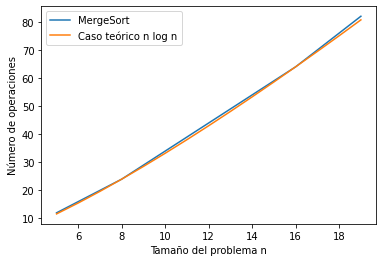

In [210]:
from random import sample
import matplotlib.pyplot as plt
import math

x=[n for n in range(5,20)] 
y1=[(n * math.log2(n)) for n in range(5,20)] # Caso teórico
y=[]

for n in range(5,20):
  a = sample(range(1, 1000), n)
  merge_comp = 0
  a = merge_sort(a)
  y.append(merge_comp)

plt.plot(x,y)
plt.plot(x,y1)
plt.legend(["MergeSort", "Caso teórico n log n"])

plt.xlabel('Tamaño del problema n')
plt.ylabel('Número de operaciones')
plt.show()

### Análisis de resultados
En primer lugar, cabe mencionar que se utilizó solo una curva para el caso teórico puesto que el algoritmo **Merge Sort** tiene la misma complejidad temporal para el mejor y peor caso que es $n\ log \, n$, ya que siempre dividirá el arreglo hasta llegar a sub-arreglos de tamaño $1$ independiente del problema de entrada.

En la gráfica se puede apreciar que el **caso experimental se encuentra muy cerca del teórico** llegando a superponerse en ciertos lugares, aunque en otros se separan ligeramente.
Esto puede deberse a que en algunos casos el arreglo no puede dividirse en partes iguales, afectando la cantidad de operaciones que deben realizarse. Por ejemplo, un arreglo de $3$ elementos será dividido en $2$ sub-arreglos de $1$ y $2$ elementos respectivamente por el algoritmo, cosa que **difiere de la teoría** puesto que en rigor debería dividirse en 2 sub-arreglos de tamaño $1.5$, que obviamente es imposible.


## Experimento 2: Merge Sort v/s Insertion Sort
Compararemos los algoritmos **Merge Sort** e **Insertion Sort** de forma gráfica para estudiar su eficiencia en relación a la cantidad de operaciones y el tiempo de ejecución.

### Implementación de Insertion Sort

In [226]:
def insertion_sort(A):
    n = len(A)
    C = 0
    for i in range(1, n):
        j = i
        C += 1
        while A[j] < A[j - 1]:
            A[j], A[j - 1] = A[j - 1], A[j]
            j -= 1
            if j == 0: break
            C += 1
    return A, C

In [227]:
arr = [5,4,3,2,1]
print(f"Arreglo desordenado: {arr}")
arr, C = insertion_sort(arr)
print(f"Arreglo ordenado: {arr}")
print(f"{C} comparaciones.")

Arreglo desordenado: [5, 4, 3, 2, 1]
Arreglo ordenado: [1, 2, 3, 4, 5]
10 comparaciones.


### 2.1 Comparación de tiempo de ejecución de los algoritmos
A continuación se medirá y se comparará gráficamente el tiempo de ejecución de ambos algoritmos con una muestra aleatoria de números y un tamaño de problema $n \in [5,500]$.

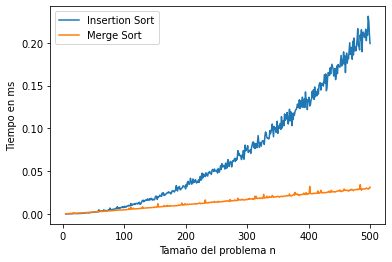

In [216]:
import datetime
from timeit import repeat

x=[]; y1=[]; y2=[];

for n in range(5,501):

    A = sample(range(1, 1001), n)

    # repeat() ejecuta 10 veces los algoritmos con el arreglo aleatorio A y retorna el mejor tiempo obtenido
    t_insert = repeat(setup="from __main__ import insertion_sort", stmt=f"insertion_sort({A})", repeat=1, number=10)
    t_merge = repeat(setup="from __main__ import merge_sort", stmt=f"merge_sort({A})", repeat=1, number=10)
    x.append(n)
    y1.append(t_insert)
    y2.append(t_merge)

plt.plot(x,y1)
plt.plot(x,y2)
plt.legend(["Insertion Sort", "Merge Sort"])

plt.xlabel('Tamaño del problema n')
plt.ylabel('Tiempo en ms')
plt.show()

### Análisis de resultados
Observando la gráfica nos podemos dar cuenta que ambos algoritmos cumplen con el rendimiento teórico esperado, que para **Insertion Sort** sería $O(n^2)$ y $O(n\ log \, n)$ para **Merge Sort**.

A partir de esto podemos concluir que **Merge Sort** es mucho mas eficiente temporalmente hablando para problemas de gran tamaño, aproximadamente desde $n \geq 100$ ya que para valores pequeños de $n$, la diferencia de los tiempos de ejecución es mínima.

### 2.2 Comparación de cantidad de operaciones entre los algoritmos
En el siguiente experimento se comparará gráficamente la cantidad de operaciones que realizan ambos algoritmos con una muestra aleatoria de números y un tamaño de problema $n \in [5,500]$.

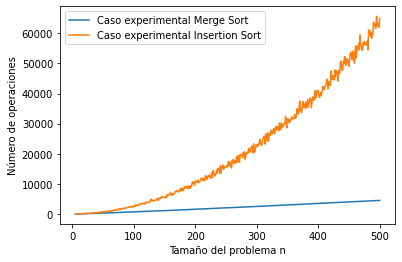

In [228]:
from random import sample
import matplotlib.pyplot as plt
import math

x=[n for n in range(5,501)] 

y=[] # caso experimental mergesort 
y1=[] # caso experimental insertionsort

for n in range(5,501):
  a = sample(range(1, 1000), n)
  merge_comp = 0
  merge_sort(a)
  a,ins_comp = insertion_sort(a)
  y.append(merge_comp)
  y1.append(ins_comp)

plt.plot(x,y)
plt.plot(x,y1)
plt.legend(["Caso experimental Merge Sort", "Caso experimental Insertion Sort"])

plt.xlabel('Tamaño del problema n')
plt.ylabel('Número de operaciones')
plt.show()

### Análisis de resultados
Como podemos observar en el gráfico, **Merge Sort** es un algoritmo mucho mas eficiente que **Insertion Sort** en relación a la cantidad de operaciones que debe realizar para problemas grandes, ya que a pesar del gran tamaño del problema las operaciones de **Merge Sort** aumentan de forma mucho mas lenta que las de **Insertion Sort**.